In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint

In [56]:
df = pd.read_hdf("store.h5")

df["time_of_day"] = df['time'].apply(lambda x: datetime.fromtimestamp(x).time())
df["day_of_month"] = df['time'].apply(lambda x: int((datetime.fromtimestamp(x)).strftime("%d")))
df["date"] = df['time'].apply(lambda x: (datetime.fromtimestamp(x)).strftime("%Y-%m-%d"))
df['returns'] = df["close"] - df["close"].shift(1)
df['abs_ret'] = abs(df['returns'])
# df["day_of_month"].astype(int,inplace = True)
df["range"] = df["high"] - df["low"]

In [57]:
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,date,returns,abs_ret,range
date_time,,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2017-07-31,NaN,NaN,2.00
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,2017-07-31,0.12,0.12,1.57
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,2017-07-31,0.37,0.37,0.97
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,2017-07-31,-0.36,0.36,0.90
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2017-07-31,1.93,1.93,2.44


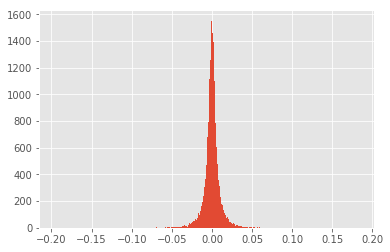

In [6]:
df['close'].pct_change().hist(bins=500)

In [13]:
df_day = df.groupby('date').mean()
df_day['retp'] = df_day['close'].pct_change()
df_day['retp_a'] = np.abs(df_day['retp'])
df_day.head()

,time,low,high,open,close,volume,day,day_of_month,returns,abs_ret,range,retp,retp_a
date,,,,,,,,,,,,,
2017-07-31,1.501486e+09,193.695833,195.868333,194.555000,194.580833,3335.321224,0.0,31.0,-0.065455,1.192727,2.172500,NaN,NaN
2017-08-01,1.501551e+09,204.393750,209.042083,206.008333,206.938750,14944.681598,1.0,1.0,0.963333,2.353333,4.648333,0.063510,0.063510
2017-08-02,1.501637e+09,221.077917,225.050417,223.161250,223.126667,9510.176772,2.0,2.0,0.013333,1.783333,3.972500,0.078226,0.078226
2017-08-03,1.501724e+09,219.288333,221.447917,220.238333,220.490000,5706.392778,3.0,3.0,0.244167,1.113333,2.159583,-0.011817,0.011817
2017-08-04,1.501810e+09,222.810417,224.510000,223.856250,223.817083,4445.109779,4.0,4.0,-0.038750,0.700417,1.699583,0.015089,0.015089


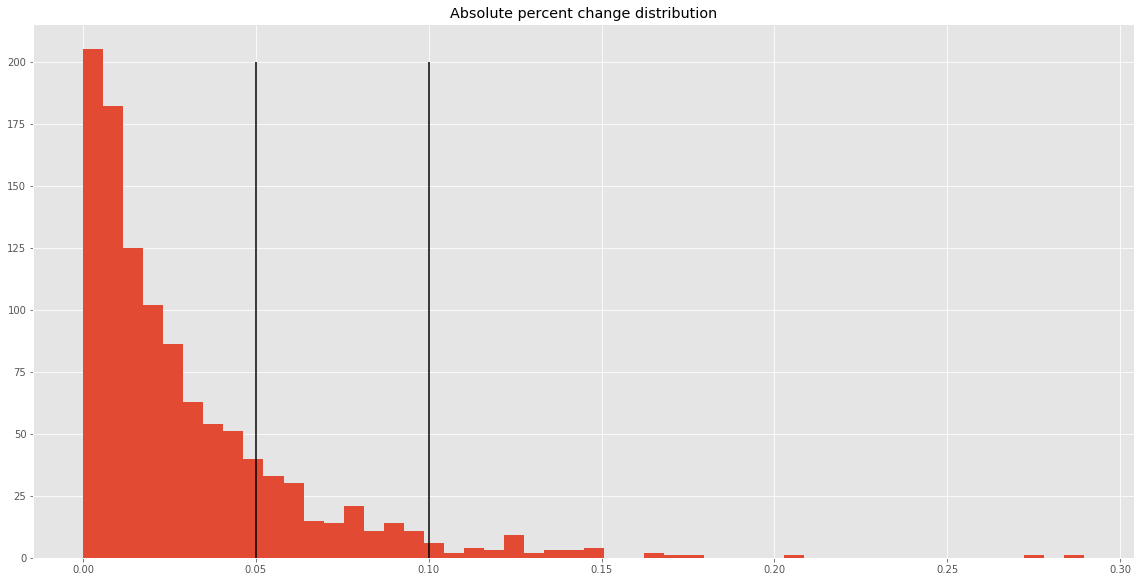

In [15]:
plt.figure(figsize=(16,8))
df_day['retp_a'].hist(bins=50) 
plt.vlines([0.05,0.1],0,200)
plt.tight_layout()
plt.title("Absolute percent change distribution")
plt.savefig("../../../report/fig/pctc.png",dpi=250)
plt.show() 

In [22]:
# filter
df_day_l5 = df_day[df_day['retp_a'] < 0.05]
df_day_5 = df_day[(df_day['retp_a'] > 0.05) & (df_day['retp_a'] < 0.1)]
df_day_10 = df_day[df_day['retp_a'] > 0.1]
df_day_10.head()

,time,low,high,open,close,volume,day,day_of_month,returns,abs_ret,range,retp,retp_a
date,,,,,,,,,,,,,
2017-08-06,1.501983e+09,249.330000,254.056250,251.571250,252.197500,12411.739482,6.0,6.0,0.610833,2.694167,4.726250,0.111592,0.111592
2017-09-15,1.505439e+09,224.170833,235.182917,229.935833,229.427917,26916.817487,4.0,15.0,-0.497500,5.303333,11.012083,-0.144127,0.144127
2017-09-16,1.505525e+09,256.429583,267.172917,261.159583,262.189167,18353.094221,5.0,16.0,1.056250,5.950417,10.743333,0.142795,0.142795
2017-09-18,1.505698e+09,272.165833,278.847500,274.311667,276.167083,11257.665828,0.0,18.0,1.898750,3.658750,6.681667,0.100233,0.100233
2017-11-25,1.511570e+09,456.660000,466.945417,460.958750,462.254583,17198.610403,5.0,25.0,1.273750,5.073750,10.285417,0.116250,0.116250


In [28]:
df_day_5[['low', 'high', 'open', 'close', 'volume',
       'returns']].describe()
# print(df_day_5[['low', 'high', 'open', 'close', 'volume',
#        'returns']].describe().to_latex())

,low,high,open,close,volume,returns
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,393.254607,401.924226,397.955906,397.938922,10313.270548,-0.014387
std,298.040808,305.717916,302.348791,302.372059,5178.683033,1.669869
min,91.986250,93.544167,92.605833,92.745833,2646.986398,-7.903750
25%,182.481563,185.088958,183.830833,183.794271,6730.351709,-0.531250
50%,276.966875,282.016250,279.603958,280.097917,9324.437458,0.068333
75%,522.655104,533.031354,528.920313,527.474896,12478.833113,0.532396
max,1347.235833,1377.132500,1366.006250,1363.753333,31125.085513,4.875833


In [32]:
df_day_5[['day_of_month','day']].mode()
print(df_day_5[['day_of_month','day']].mode().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  day\_of\_month &  day \\
\midrule
0 &          23.0 &  3.0 \\
\bottomrule
\end{tabular}



In [35]:
# 10 percent or greater

df_day_10[['low', 'high', 'open', 'close', 'volume',
       'returns']].describe()
print(df_day_10[['low', 'high', 'open', 'close', 'volume',
       'returns']].describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &          low &         high &         open &        close &        volume &    returns \\
\midrule
count &    41.000000 &    41.000000 &    41.000000 &    41.000000 &     41.000000 &  41.000000 \\
mean  &   352.536433 &   366.085457 &   359.722541 &   359.313923 &  19272.578006 &  -0.416596 \\
std   &   282.334042 &   295.841460 &   289.756459 &   288.996099 &  10841.346712 &   3.194639 \\
min   &    88.517083 &    91.353333 &    90.230417 &    89.629583 &   7716.548928 & -10.818750 \\
25\%   &   160.810833 &   164.762500 &   162.386667 &   162.990833 &  11806.177713 &  -1.111250 \\
50\%   &   224.170833 &   230.869583 &   228.202083 &   227.710417 &  16902.097708 &   0.010833 \\
75\%   &   534.257917 &   547.426667 &   542.708333 &   539.067500 &  22731.665617 &   0.795417 \\
max   &  1114.007083 &  1144.463750 &  1130.869167 &  1133.618333 &  66780.561746 &   7.758333 \\
\bottomrule
\end{tabular}



In [36]:
df_day_10[['day_of_month','day']].mode()
print(df_day_10[['day_of_month','day']].mode().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  day\_of\_month &  day \\
\midrule
0 &          15.0 &  4.0 \\
\bottomrule
\end{tabular}



In [37]:
# <5  percent or greater

df_day_l5[['low', 'high', 'open', 'close', 'volume',
       'returns']].describe()
print(df_day_l5[['low', 'high', 'open', 'close', 'volume',
       'returns']].describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &          low &         high &         open &        close &        volume &     returns \\
\midrule
count &   899.000000 &   899.000000 &   899.000000 &   899.000000 &    899.000000 &  899.000000 \\
mean  &   293.647002 &   297.290324 &   295.549123 &   295.579857 &   4807.769736 &    0.031466 \\
std   &   201.763226 &   205.377567 &   203.713711 &   203.762793 &   3447.003381 &    0.687126 \\
min   &    82.847917 &    83.723750 &    83.414583 &    83.293333 &    725.863348 &   -5.000417 \\
25\%   &   168.759792 &   170.563542 &   169.801250 &   169.625000 &   2586.147062 &   -0.144891 \\
50\%   &   223.373750 &   225.083333 &   224.404167 &   224.436667 &   3916.392366 &    0.011250 \\
75\%   &   317.486875 &   321.048750 &   319.219583 &   319.338333 &   5954.465718 &    0.198125 \\
max   &  1311.549583 &  1339.132500 &  1328.027500 &  1329.035833 &  32320.300813 &    6.276250 \\
\bottomrule
\end{tabular}



In [38]:
df_day_l5[['day_of_month','day']].mode()
print(df_day_l5[['day_of_month','day']].mode().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  day\_of\_month &  day \\
\midrule
0 &           4.0 &  6.0 \\
\bottomrule
\end{tabular}



In [39]:
# stationary

from statsmodels.tsa.stattools import adfuller

In [70]:
res = adfuller(df["close"].dropna(axis=0))
if res[1] > 0.05:
    print(f"p value for hourly close {res[1]} likely not stationary")
else:
    print(f"p value for hourly close {res[1]} likely stationary")
    
res = adfuller(df["returns"].dropna(axis=0))
if res[1] > 0.05:
    print(f"p value for hourly returns {res[1]} likely not stationary")
else:
    print(f"p value for hourly returns {res[1]} likely stationary")

res = adfuller(df[df.index > datetime(2020,1,1)]["close"])
if res[1] > 0.05:
    print(f"p value for hourly this year close {res[1]} likely not stationary")
else:
    print(f"p value for hourly this year close {res[1]} likely stationary")
    
res = adfuller(df[df.index > datetime(2020,8,1)]["close"])
if res[1] > 0.05:
    print(f"p value for hourly close from aug 1 {res[1]} likely not stationary")
else:
    print(f"p value for hourly close from aug 1 {res[1]} likely stationary")

p value for hourly close 0.37742176859100934 likely not stationary
p value for hourly returns 0.0 likely stationary
p value for hourly this year close 0.9879970913768994 likely not stationary
p value for hourly close from aug 1 0.4431708128652189 likely not stationary


In [62]:
res = adfuller(df["returns"].dropna(axis=0))
if res[1] > 0.05:
    print(f"p value for hourly returns {res[1]} likely not stationary")
else:
    print(f"p value for hourly returns {res[1]} likely stationary")

p value for hourly returns 0.0 likely stationary


In [68]:
res = adfuller(df[df.index > datetime(2020,1,1)]["close"])
if res[1] > 0.05:
    print(f"p value for hourly this year close {res[1]} likely not stationary")
else:
    print(f"p value for hourly this year close {res[1]} likely stationary")

p value for hourly this year close 0.9879970913768994 likely not stationary


In [69]:
res = adfuller(df[df.index > datetime(2020,8,1)]["close"])
if res[1] > 0.05:
    print(f"p value for hourly close from aug 1 {res[1]} likely not stationary")
else:
    print(f"p value for hourly close from aug 1 {res[1]} likely stationary")

p value for hourly close from aug 1 0.4431708128652189 likely not stationary


In [75]:
# POC 

dates = df.groupby("date").mean().index
list_by_date = []
for i in range(len(dates)):
    list_by_date.append(df[df["date"] == dates[i]])

In [107]:
POC = np.zeros(len(list_by_date))
for i in range(len(list_by_date)):
    a,b = np.histogram(list_by_date[i]["close"],weights=list_by_date[i]["volume"])
    idx = a.argmax()
    POC[i] = (b[idx] + b[idx+1])/2
POC

array([191.602 , 214.4375, 225.78  , ..., 374.5445, 384.911 , 394.576 ])

In [115]:
n_poc_cross = 0
for i in range(1,len(POC)):
    if (list_by_date[i]['low'].min() < POC[i-1]) & (POC[i-1] < list_by_date[i]['high'].max()):
        n_poc_cross += 1 

In [118]:
print(f"{n_poc_cross/1010*100}% of the time price comes back to the POC the next trading day")

68.9108910891089% of the time price comes back to the POC the next trading day
